In [1]:
import pandas as pd
from confidence import *

In [2]:
# Prepare dataset

data = pd.read_csv('~/Datasets/parkinsons.data.txt', sep = ',')
data = data.drop('name', axis=1) #id attribute
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
y = data['status']
X = data.drop('status', axis = 1)
y = np.ravel(y)
len(y)

195

In [5]:
print np.unique(y, return_counts=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 
rbtsc = RobustScaler()
X_train = rbtsc.fit_transform(X_train)   # fit + transform
X_test = rbtsc.transform(X_test) 

(array([0, 1]), array([ 48, 147]))


### All Results in One Graph

Accuracy at threshold 0.0 is 0.782051282051
Accuracy at threshold 0.01 is 0.782051282051
Accuracy at threshold 0.02 is 0.782051282051
Accuracy at threshold 0.03 is 0.782051282051
Accuracy at threshold 0.04 is 0.782051282051
Accuracy at threshold 0.05 is 0.782051282051
Accuracy at threshold 0.06 is 0.782051282051
Accuracy at threshold 0.07 is 0.782051282051
Accuracy at threshold 0.08 is 0.782051282051
Accuracy at threshold 0.09 is 0.782051282051
Accuracy at threshold 0.1 is 0.794871794872
Accuracy at threshold 0.11 is 0.794871794872
Accuracy at threshold 0.12 is 0.807692307692
Accuracy at threshold 0.13 is 0.820512820513
Accuracy at threshold 0.14 is 0.858974358974
Accuracy at threshold 0.15 is 0.871794871795
Accuracy at threshold 0.16 is 0.871794871795
Accuracy at threshold 0.17 is 0.871794871795
Accuracy at threshold 0.18 is 0.871794871795
Accuracy at threshold 0.19 is 0.871794871795
Accuracy at threshold 0.2 is 0.884615384615
Accuracy at threshold 0.21 is 0.897435897436
Accuracy at t

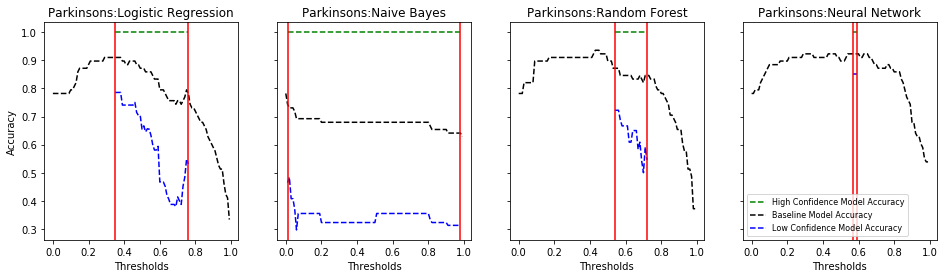

In [21]:
model = perform_logistic_regression(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(16,4))


ax1.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax1.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax1.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax1.axvline(conf_threshold[0], color='r')
ax1.axvline(conf_threshold[-1], color='r')
ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Accuracy')
ax1.set_title('Parkinsons:Logistic Regression')


model = perform_gaussian_nb(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)
ax2.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax2.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax2.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax2.axvline(conf_threshold[0], color='r')
ax2.axvline(conf_threshold[-1], color='r')
ax2.set_xlabel('Thresholds')
ax2.set_title('Parkinsons:Naive Bayes')



model = perform_random_forest(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)
ax3.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax3.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax3.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax3.axvline(conf_threshold[0], color='r')
ax3.axvline(conf_threshold[-1], color='r')
ax3.set_xlabel('Thresholds')
ax3.set_title('Parkinsons:Random Forest')



model = perform_neural_network(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)
ax4.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax4.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax4.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax4.axvline(conf_threshold[0], color='r')
ax4.axvline(conf_threshold[-1], color='r')
ax4.set_xlabel('Thresholds')
ax4.set_title('Parkinsons:Neural Network')

ax4.legend(loc='best', prop={'size': 8})
plt.show()   
